# Bases en cartesianas, esféricas y cilíndricas
En este notebook ilustramos diversas funciones que aparecen en el problema de Sturm-Liouville en coordenadas cartesianas, esféricas y cilíndricas. Para calcular y graficar funciones usamos NumPy, Matplotlib, y muchas de las funciones especiales implementadas en SciPy (https://docs.scipy.org/doc/scipy/reference/special.html#). Recuerden que cada celda a continuación se debe ejecutar apretando SHIFT+ENTER:

In [1]:
# Importamos NumPy, Matplotlib, y las funciones especiales de SciPy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from scipy.special import *

## Coordenadas cartesianas
En coordenadas cartesianas aparecen senos y cosenos. Graficamos algunas de estas funciones en el intervalo [0,1].

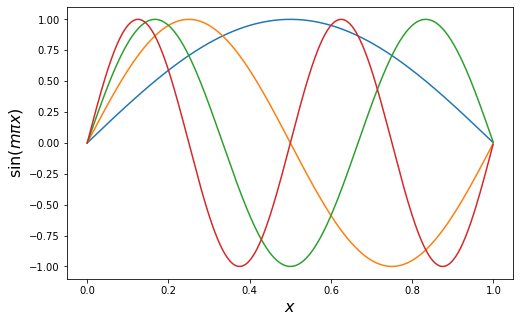

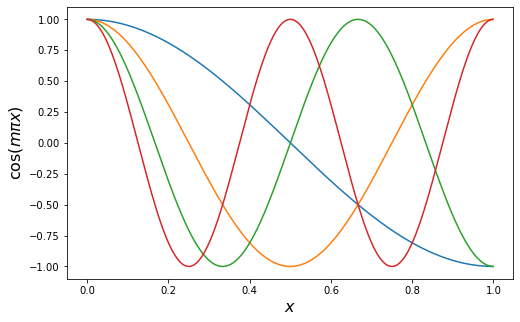

In [2]:
# Armamos un vector que toma valores entre 0 y 1, con un paso de 0.001
x = np.arange(0,1,.001)   

# Graficamos sin(m*pi*x) para diferentes valores de m
plt.figure(figsize=(8,5))
plt.plot(x, np.sin(  np.pi*x))
plt.plot(x, np.sin(2*np.pi*x))
plt.plot(x, np.sin(3*np.pi*x))
plt.plot(x, np.sin(4*np.pi*x))
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$\sin(m \pi x)$',fontsize=16)
plt.show()

# Graficamos cos(m*pi*x) para diferentes valores de m
plt.figure(figsize=(8,5))
plt.plot(x, np.cos(  np.pi*x))
plt.plot(x, np.cos(2*np.pi*x))
plt.plot(x, np.cos(3*np.pi*x))
plt.plot(x, np.cos(4*np.pi*x))
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$\cos(m \pi x)$',fontsize=16)
plt.show()

## Coordenadas esféricas
En coordenadas esféricas aparecen nuevamente senos y cosenos (en la exponencial compleja), y polinomios y funciones generalizadas de Lagrange. Graficamos algunas de estas funciones en el intervalo [0,1]. Prueben cambiar los valores de l y m. Noten que la función lpmv, que calcula las funciones asociadas de Lagrange, tiene formato lpmv(m, l, x).

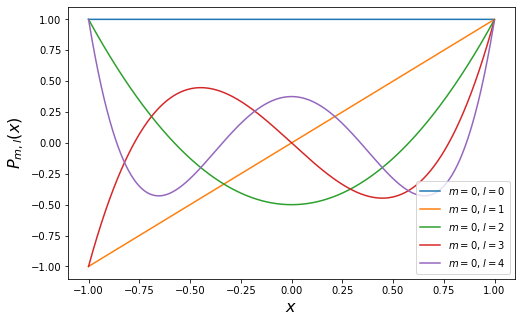

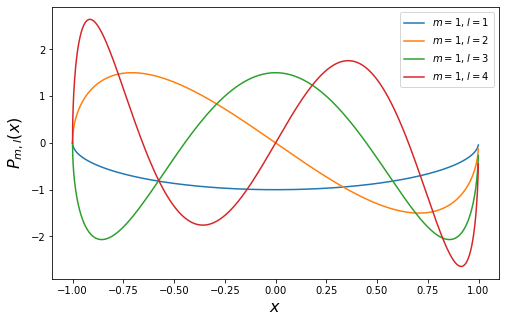

In [3]:
# Armamos un vector que toma valores entre 0 y 1, con un paso de 0.001
x = np.arange(-1,1,.001)   

# Graficamos P_{m,l}(x) para diferentes valores de l y m=0 fijo
plt.figure(figsize=(8,5))
plt.plot(x, lpmv(0,0,x),label='$m=0$, $l=0$')
plt.plot(x, lpmv(0,1,x),label='$m=0$, $l=1$')
plt.plot(x, lpmv(0,2,x),label='$m=0$, $l=2$')
plt.plot(x, lpmv(0,3,x),label='$m=0$, $l=3$')
plt.plot(x, lpmv(0,4,x),label='$m=0$, $l=4$')
plt.legend(fontsize=10)
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$P_{m,l}(x)$',fontsize=16)
plt.show()

# Graficamos P_{m,l}(x) para diferentes valores de l y m=1 fijo
plt.figure(figsize=(8,5))
plt.plot(x, lpmv(1,1,x),label='$m=1$, $l=1$')
plt.plot(x, lpmv(1,2,x),label='$m=1$, $l=2$')
plt.plot(x, lpmv(1,3,x),label='$m=1$, $l=3$')
plt.plot(x, lpmv(1,4,x),label='$m=1$, $l=4$')
plt.legend(fontsize=10)
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$P_{m,l}(x)$',fontsize=16)
plt.show()

El producto de exponenciales complejas con las funciones generalizadas de Lagrange nos dan los armónicos esféricos. Graficamos la parte real de estas funciones en la superficie de la esfera unitaria. Prueben cambiar los valores de l y m:

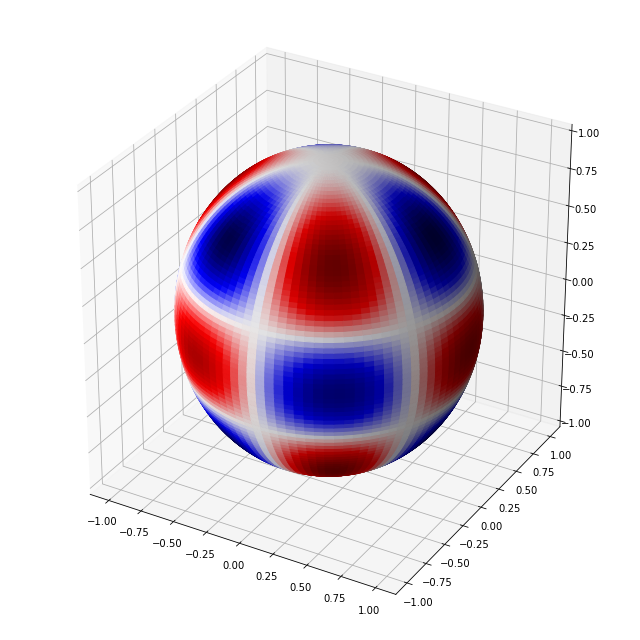

In [4]:
theta = np.linspace(0,np.pi,100)      # linspace genera un vector con 100 valores equiespaciados entre 0 y pi
phi   = np.linspace(0,2*np.pi,100)    # phi toma valores entre 0 y 2*pi
theta, phi = np.meshgrid(theta, phi)  # meshgrid genera una malla 2D con todos los valores de theta y phi

# Calculamos las coordenadas cartesianas (x,y,z) de todos los puntos en la malla
x = np.sin(theta)*np.cos(phi)
y = np.sin(theta)*np.sin(phi)
z = np.cos(theta)

# Elegimos valores para l y m (prueben en particular l=1, m=0,1)
l = 5
m = 3

# Calculamos la parte real del harmónico esférico Y(l,m) y lo normalizamos entre 0 y 1
sph = np.real(sph_harm(m,l,phi,theta))
sphmin = np.min(sph)
sphnor = np.max(sph) - np.min(sph)
sphcolor = (sph - sphmin)/sphnor

# Coloreamos la superficie de la esfera con el valor normalizado de la parte real del armónico esférico
fig = plt.figure(figsize=(9,9))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, rstride=1,cstride=1, facecolors=cm.seismic(sphcolor))
plt.tight_layout()
plt.show()

## Coordenadas cilíndricas
En coordenadas cilíndricas aparecen nuevamente senos y cosenos, y diversas funciones de Bessel. Graficamos algunas de estas funciones en el intervalo [0,1]. Prueben cambiar los valores de los índices.

ceros de J _ 1 (x) = [ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771 18.07106397]


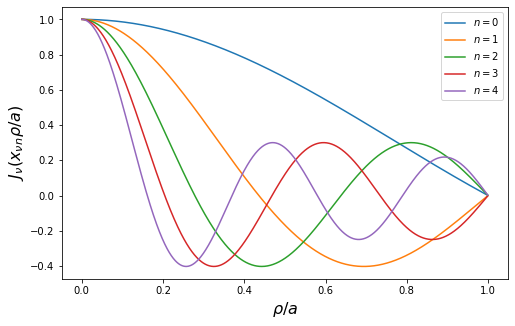

ceros de Y _ 1 (x) = [ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771 18.07106397]


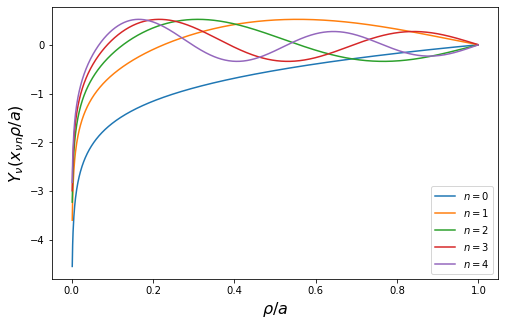

In [5]:
# Armamos un vector que toma valores entre 0 y 1, con un paso de 0.001
x = np.arange(0,1,.001)   

# Definimos un valor para nu
nu = 1

# Calculamos los ceros de la función de Bessel Jn
xvn = jn_zeros(0, 6)
print('ceros de J _',nu,'(x) =', xvn)

# Graficamos P_{m,l}(x) para diferentes valores de l y m=0 fijo
plt.figure(figsize=(8,5))
plt.plot(x, jv(0,xvn[0]*x),label='$n=0$')
plt.plot(x, jv(0,xvn[1]*x),label='$n=1$')
plt.plot(x, jv(0,xvn[2]*x),label='$n=2$')
plt.plot(x, jv(0,xvn[3]*x),label='$n=3$')
plt.plot(x, jv(0,xvn[4]*x),label='$n=4$')
plt.legend(fontsize=10)
plt.xlabel(r'$\rho/a$',fontsize=16)
plt.ylabel(r'$J_\nu({x_\nu}_n \rho/a)$',fontsize=16)
plt.show()

# Calculamos los ceros de la función de Bessel Yn de segunda especie (o Nn por Neumann)
yvn = yn_zeros(0, 6)
print('ceros de Y _',nu,'(x) =', xvn)

# Graficamos P_{m,l}(x) para diferentes valores de l y m=0 fijo
plt.figure(figsize=(8,5))
plt.plot(x, yv(0,yvn[0]*x),label='$n=0$')
plt.plot(x, yv(0,yvn[1]*x),label='$n=1$')
plt.plot(x, yv(0,yvn[2]*x),label='$n=2$')
plt.plot(x, yv(0,yvn[3]*x),label='$n=3$')
plt.plot(x, yv(0,yvn[4]*x),label='$n=4$')
plt.legend(fontsize=10)
plt.xlabel(r'$\rho/a$',fontsize=16)
plt.ylabel(r'$Y_\nu({x_\nu}_n \rho/a)$',fontsize=16)
plt.show()